In [780]:
print('This project attempts to analyze trends in the stock market, starting with a Monte Carlo Simulation..\
More segments will be added in the future.')

This project attempts to analyze trends in the stock market, starting with a Monte Carlo Simulation..More segments will be added in the future.


In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [525]:
from datapackage import Package
package = Package('https://datahub.io/core/s-and-p-500-companies-financials/datapackage.json')

for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        fullpackage = pd.DataFrame(resource.read())
        fullpackage.columns = resource.headers

In [425]:
print(fullpackage.head())

  Symbol                 Name                  Sector   Price Price/Earnings  \
0    MMM           3M Company             Industrials  222.89          24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24          27.76   
2    ABT  Abbott Laboratories             Health Care   56.27          22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48          19.41   
4    ACN        Accenture plc  Information Technology  150.51          25.47   

  Dividend Yield Earnings/Share 52 Week Low 52 Week High    Market Cap  \
0      2.3328617           7.92      259.77       175.49  138721055226   
1      1.1479592            1.7       68.39       48.925   10783419933   
2      1.9089824           0.26        64.6        42.28  102121042306   
3      2.4995599           3.29      125.86        60.05  181386347059   
4      1.7144699           5.44       162.6       114.82   98765855553   

        EBITDA Price/Sales Price/Book  \
0   9048000000   4.3902707      1

In [206]:
tickers=fullpackage['Symbol']
print(tickers.head(),tickers.tail())
"""
Ticker symbol for all 505 stocks in the S&P 500
"""

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
Name: Symbol, dtype: object 500     XYL
501     YUM
502     ZBH
503    ZION
504     ZTS
Name: Symbol, dtype: object


'\nTicker symbol for all 505 stocks in the S&P 500\n'

In [209]:
print(fullpackage['Sector'].value_counts())
"""The Industry secotr in the S&P 500 and the number of companies in each sector"""

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64


'We can see the industry of every stock within the S&P 500'

In [526]:
from pandas_datareader import data, wb
import datetime

import fix_yahoo_finance as yf
yf.pdr_override() 

In [527]:
end = datetime.datetime.today()
start = end - datetime.timedelta(days=1095)
print('Data start date: {}'.format(start))
print('Data end date: {}'.format(end))
print('Stock Market data will be retrieved for the last 3 years starting from today')

Data start date: 2015-10-16 18:49:02.700661
Data end date: 2018-10-15 18:49:02.700661
Stock Market data will be retrieved for the last 3 years starting from today


In [528]:
stockdata = pd.DataFrame(data.get_data_yahoo(tickers.tolist(),start,end, as_panel=False,group_by = 'ticker'))

[*********************100%***********************]  505 of 505 downloaded


In [334]:
print(stockdata.head())

                   MMM                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2015-10-13  148.910004  150.000000  148.729996  149.110001  138.256149   
2015-10-14  149.000000  149.660004  148.179993  148.320007  137.523605   
2015-10-15  149.639999  149.880005  148.020004  149.190002  138.330307   
2015-10-16  149.770004  149.779999  147.479996  148.699997  137.875961   
2015-10-19  147.970001  148.419998  147.229996  148.000000  137.226913   

                           AOS                                    ...     \
             Volume       Open       High        Low      Close   ...      
Date                                                              ...      
2015-10-13  2027600  34.860001  35.369999  34.400002  34.410000   ...      
2015-10-14  2260300  34.355000  34.560001  34.115002  34.215000   ...      
2015-10-15  2588500  34.310

In [662]:
print('This is a randomly selected stock within the S&P 500 with today\'s stock quote')
counter = np.random.randint(0,505)
print(df['Name'][counter])
print(df['Symbol'][counter])
print(stockdata[df['Symbol'][counter]].iloc[-1])

This is a randomly selected stock within the S&P 500 with today's stock quote
Martin Marietta Materials
MLM
Open            169.070007
High            170.880005
Low             167.669998
Close           168.589996
Adj Close       168.589996
Volume       689734.000000
Name: 2018-10-15 00:00:00, dtype: float64


In [663]:
logR = np.log(1+stockdata[tickers[counter]]['Adj Close'].pct_change())
print(logR.head(15))

Date
2015-10-16         NaN
2015-10-19   -0.020009
2015-10-20   -0.000404
2015-10-21   -0.016855
2015-10-22    0.043587
2015-10-23    0.003145
2015-10-26   -0.028530
2015-10-27   -0.010555
2015-10-28    0.038954
2015-10-29   -0.007750
2015-10-30    0.022619
2015-11-02    0.000773
2015-11-03   -0.088564
2015-11-04    0.025977
2015-11-05    0.062973
Name: Adj Close, dtype: float64


This is a chart of the the daily adjusted close of Martin Marietta Materials


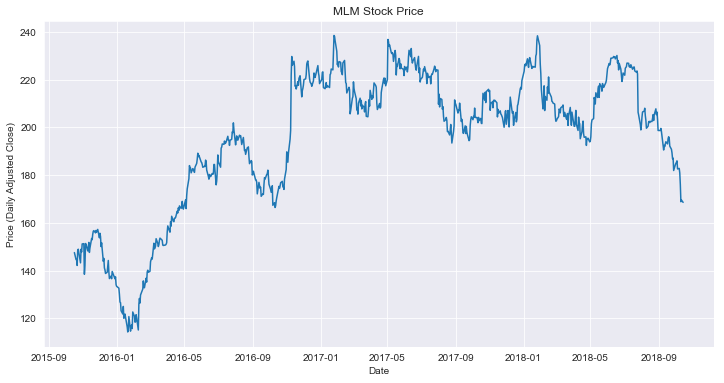

This is a chart of the daily log returns of Martin Marietta Materials


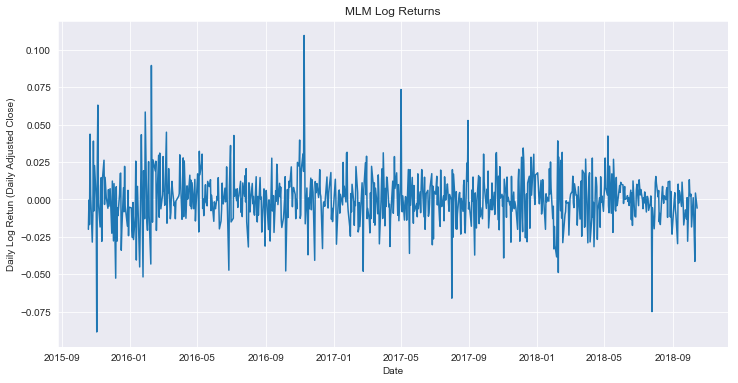

In [664]:
sns.set_style('darkgrid')
plt.figure(figsize=[12,6])
sns.lineplot(data = stockdata[tickers[counter]]['Adj Close'])
plt.title(tickers[counter]+' Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (Daily Adjusted Close)')
print('This is a chart of the the daily adjusted close of {}'.format(df.Name[counter]))
plt.show()

plt.figure(figsize=[12,6])
sns.lineplot(data = logR)
plt.title(tickers[counter]+' Log Returns')
plt.xlabel('Date')
plt.ylabel('Daily Log Retun (Daily Adjusted Close)')
print('This is a chart of the daily log returns of {}'.format(df.Name[counter]))
plt.show()

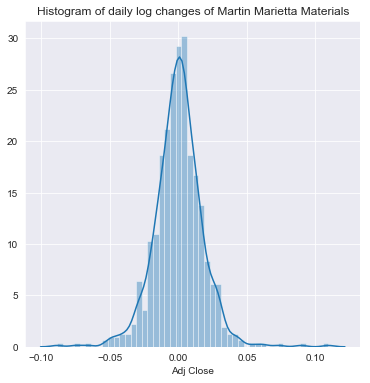

As you can see, the daily percentage change in the returns of a stock is close to being normally      distributed this is a important concept in Monte Carlo simulations as we use the assumptions that      changes in daily returns are normally distributed.


In [665]:
plt.figure(figsize=[6,6])
sns.distplot(logR[1:])
plt.title('Histogram of daily log changes of {}'.format(df['Name'][counter]))
plt.show()

print('As you can see, the daily percentage change in the returns of a stock is close to being normally\
      distributed this is a important concept in Monte Carlo simulations as we use the assumptions that\
      changes in daily returns are normally distributed.')

In [668]:
u = logR.mean()
var = logR.var()
drift = u-(0.5*var)
sigma = logR.std()
print('Mean: {}'.format(u))
print('Variance: {}'.format(var))
print('Drift: {}'.format(drift))
print('Standard Deviation: {}'.format(sigma))

Mean: 0.00017671214182539874
Variance: 0.0003154473396681752
Drift: 1.8988471991311136e-05
Standard Deviation: 0.017760837245698054


In [725]:
intervals = 365
iterations = 500

In [726]:
daily_returns = np.exp(drift+sigma*(norm.ppf(np.random.rand(intervals, iterations))))
print(daily_returns)

[[1.0259892  1.02786266 0.99011956 ... 1.0397287  1.02586219 1.01816846]
 [0.99729632 1.0132853  0.99476686 ... 1.02832664 0.99044412 1.01524348]
 [1.00094145 0.98159981 1.00515831 ... 0.99200164 1.02015056 0.98311363]
 ...
 [0.99906318 0.99278777 1.00628588 ... 1.0105351  0.98498085 1.00103199]
 [0.99181577 1.0056038  0.97770602 ... 1.02628472 1.00627206 0.99244163]
 [0.98755    1.00587501 1.00231543 ... 0.96829872 1.00076474 0.97983959]]


In [746]:
K = stockdata[df['Symbol'][counter]]['Adj Close'].iloc[-1]
print('This is the price on the first day $',K)

This is the price on the first day $ 168.58999599999999


In [728]:
price_list = np.array(daily_returns)
price_list[0] = K

for t in range(1, intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [747]:
print(price_list)
print('This is a matrix that contains all the data from our Monte Carlo simulation, dimensions defined by the number of iterations that we plan on running the simulation by the number of dayas we are predicting the price.')

[[168.589996   168.589996   168.589996   ... 168.589996   168.589996
  168.589996  ]
 [168.13418305 170.82976385 167.70774171 ... 173.36558465 166.97896995
  171.15989362]
 [168.29247223 167.68646408 168.57282959 ... 171.97894492 170.34369051
  168.26962465]
 ...
 [143.23761703 273.47889576  76.46708649 ... 145.88514996  95.29766443
  231.55043073]
 [142.06532678 275.01141692  74.76233109 ... 149.71970048  95.89537714
  229.80028747]
 [140.29661313 276.62711306  74.93543802 ... 144.97339426  95.96871264
  225.16742048]]
This is a matrix that contains all the data from our Monte Carlo simulation, dimensions defined by the number of iterations that we plan on running the simulation by the number of dayas we are predicting the price.


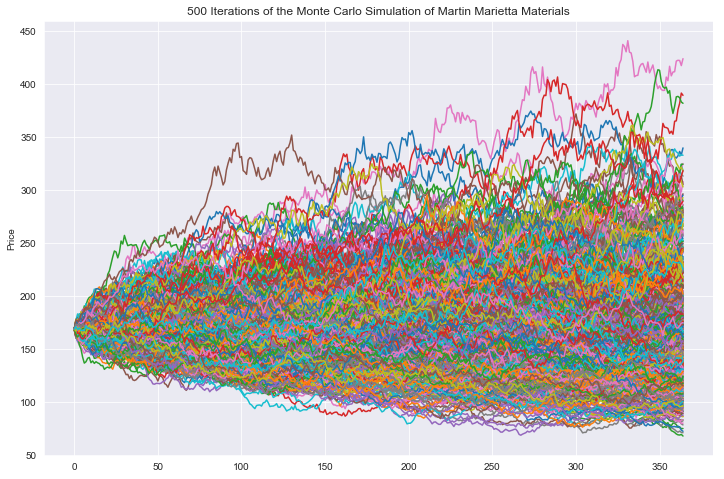

In [750]:
plt.figure(figsize = (12,8))
plt.plot(price_list)
plt.title('{} Iterations of the Monte Carlo Simulation of {}'.format(iterations, df['Name'][counter]))
plt.ylabel('Price')
plt.show()

In [779]:
print('Min: ',round(price_list[-1].min(),2))
print('Max: ',round(price_list[-1].max(),2))
print('After integrating our monte carlo simulation for',iterations,' iterations, the range that we get for our simulation \
on the final day, day', intervals,' day is $', round(price_list[-1].max() - price_list[-1].min(),2))
print('This is a standard Monte Carlo Simulation that is used to predict stock prices, as you can see there is\
 a significant gap in the range in final price using the Monte Carlo Simulation')

Min:  67.82
Max:  423.97
After integrating our monte carlo simulation for 500  iterations, the range that we get for our simulation on the final day, day 365  day is $ 356.14
This is a standard Monte Carlo Simulation that is used to predict stock prices, as you can see there is a significant gap in the range in final price using the Monte Carlo Simulation
